In [116]:
## Initialize libraries and path variables
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

%matplotlib inline

In [117]:
## Import dataset
avocadoDat_unproc = pd.read_csv('avocado.csv')

print(avocadoDat_unproc.head())
print()
print(avocadoDat_unproc.info())

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Al

### Features
* Date - The date of the observation
* AveragePrice - the average price of a single avocado
* type - conventional or organic
* year - the year
* Region - the city or region of the observation
* Total Volume - Total number of avocados sold
* 4046 - Total number of avocados with PLU 4046 sold
* 4225 - Total number of avocados with PLU 4225 sold
* 4770 - Total number of avocados with PLU 4770 sold

In [118]:
## Characteristics
print('Datatypes of features')
print(str(avocadoDat_unproc.dtypes))
print()

print('Unique objects of feautre X')
print(pd.unique(avocadoDat_unproc['region']))
print('Number of unique objects of feautre X')
print(avocadoDat_unproc['region'].nunique())
print()

print('Number of dimensions')
print(avocadoDat_unproc.ndim)
print('Dataset size')
row, columns = avocadoDat_unproc.shape
print("Dataset Rows:", row)
print("Dataset Columns:", columns)
print()

# Feature inspection
print('FEATURES')
print(avocadoDat_unproc['AveragePrice'].describe())
# or .max()/ .min()/ .mean()/ .std()/ .count()
print()

Datatypes of features
Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

Unique objects of feautre X
['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'CincinnatiDayton'
 'Columbus' 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewOrleansMobile' 'NewYork' 'Northeast'
 'NorthernNewEngland' 'Orlando' 'Philadelphia' 'PhoenixTucson'
 'Pittsburgh' 'Plains' 'Portland' 'RaleighGreensboro' 'RichmondNorfolk'
 'Roanoke' 'Sacramento' 'SanDiego' 'SanFrancisco' 

In [140]:
## Data preprocessing
# Removing unnecessary features
avocadoDat_proc = avocadoDat_unproc.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13]]

# Renam Avocado Size Columsn
avocadoDat_proc = avocadoDat_proc.rename(index=str, columns={"Total Volume" : "TotalVol", "4046" : "SmallHass", "4225" : "LargeHass", "4770" : "XLargeHass", "Total Bags" : "TotalBags", "Small Bags" : "SmallBags", "Large Bags" : "LargeBags", "XLarge Bags" : "XLargeBags"})

# Date transformation
avocadoDat_proc['Date'] = pd.to_datetime(avocadoDat_proc['Date'])

# Region feature: includes cities, directions(Northeast,...), TotalUS, Can we use all?


# Missing data values
print(avocadoDat_proc.isnull().sum())
print()

# Feature Scaling?
    # We have one column with animal ages from 4–17 and we have animal worth that ranges from $48,000-$83,000. Not only is the worth column made up of much     higher numbers than the age column, but the variables also cover a much wider range of data. That means that the Euclidean distance will be dominated by worth and will wind up dominating the age data.
    # What if Euclidean distance doesn’t play a part in your specific machine learning model? Scaling the features will still make the model much faster, so you might want to include this step when you’re preprocessing your data.

# Object-Datatype features binary encoden (type)/ OneHotEncoder (region)?


# Normalization of sales to Inhabitans in city



# Final, pre-processed dataset
avocadoDat = avocadoDat_proc
print(avocadoDat.info())

Date            0
AveragePrice    0
TotalVol        0
SmallHass       0
LargeHass       0
XLargeHass      0
TotalBags       0
SmallBags       0
LargeBags       0
XLargeBags      0
type            0
year            0
region          0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Index: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   TotalVol      18249 non-null  float64       
 3   SmallHass     18249 non-null  float64       
 4   LargeHass     18249 non-null  float64       
 5   XLargeHass    18249 non-null  float64       
 6   TotalBags     18249 non-null  float64       
 7   SmallBags     18249 non-null  float64       
 8   LargeBags     18249 non-null  float64       
 9   XLargeBags    18249 non-null  float64       
 10  type          18249 non-null  object       

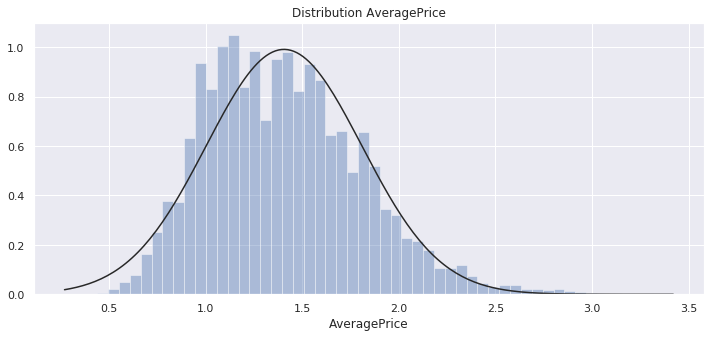

In [128]:
## Feature Visualization

from scipy.stats import norm
sns.set()
plt.pyplot.figure(figsize=(12,5))
plt.pyplot.title("Distribution AveragePrice")
ax = sns.distplot(avocadoDat['AveragePrice'], kde=False, fit=norm)

In [ ]:
# Price over time

In [ ]:
# Price per region

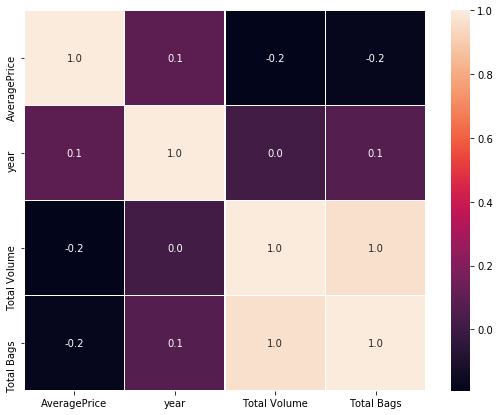

In [124]:
fig, ax = plt.pyplot.subplots()
fig.set_size_inches(9, 7)
sns.heatmap(avocadoDat[['AveragePrice','year','Total Volume','Total Bags']].corr(), annot=True , linewidths = .5 , fmt= '.1f', ax=ax)

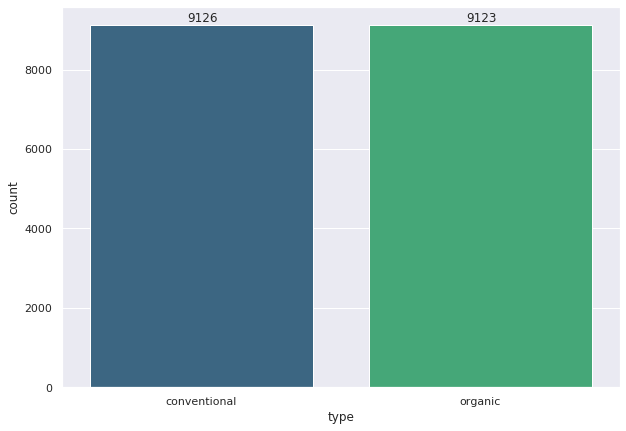

In [135]:
f,ax = plt.pyplot.subplots(figsize = (10,7))
ax = sns.countplot(x=avocadoDat.type,label="Count",palette="viridis")
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+75))

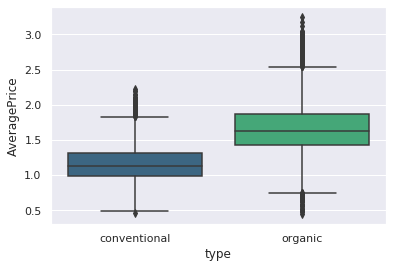

In [137]:
sns.boxplot(x='type', y='AveragePrice', data=avocadoDat, palette='viridis')

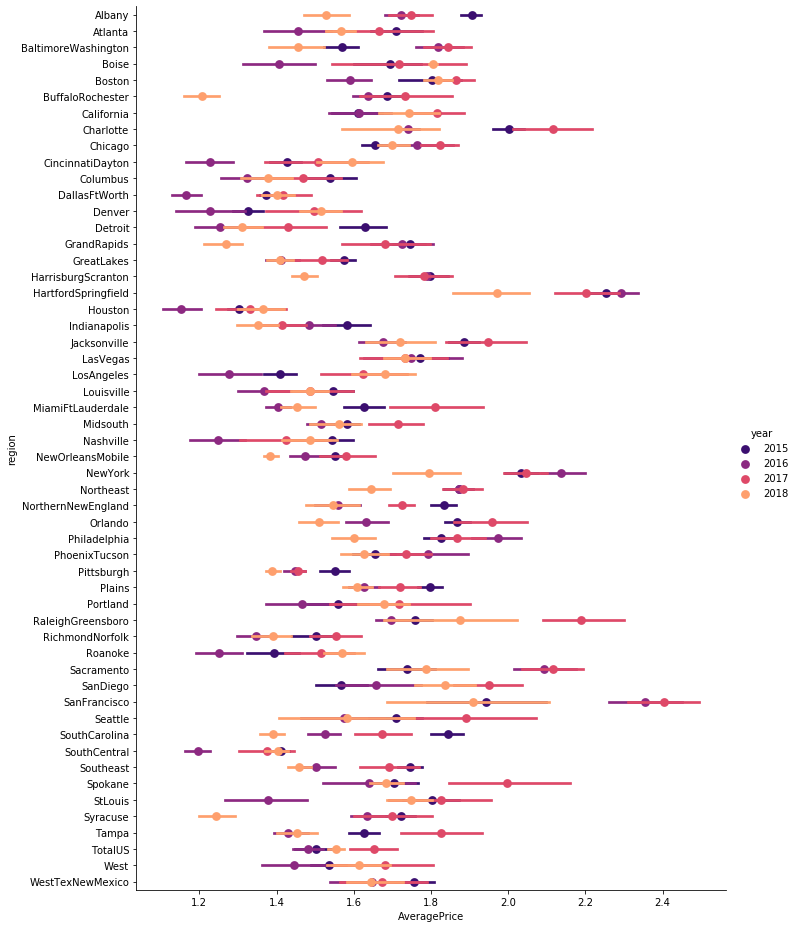

In [35]:
mask = avocadoDat['type']=='organic'
g = sns.factorplot('AveragePrice','region',data=avocadoDat[mask],
                   hue='year',
                   size=13,
                   aspect=0.8,
                   palette='magma',
                   join=False,
              )

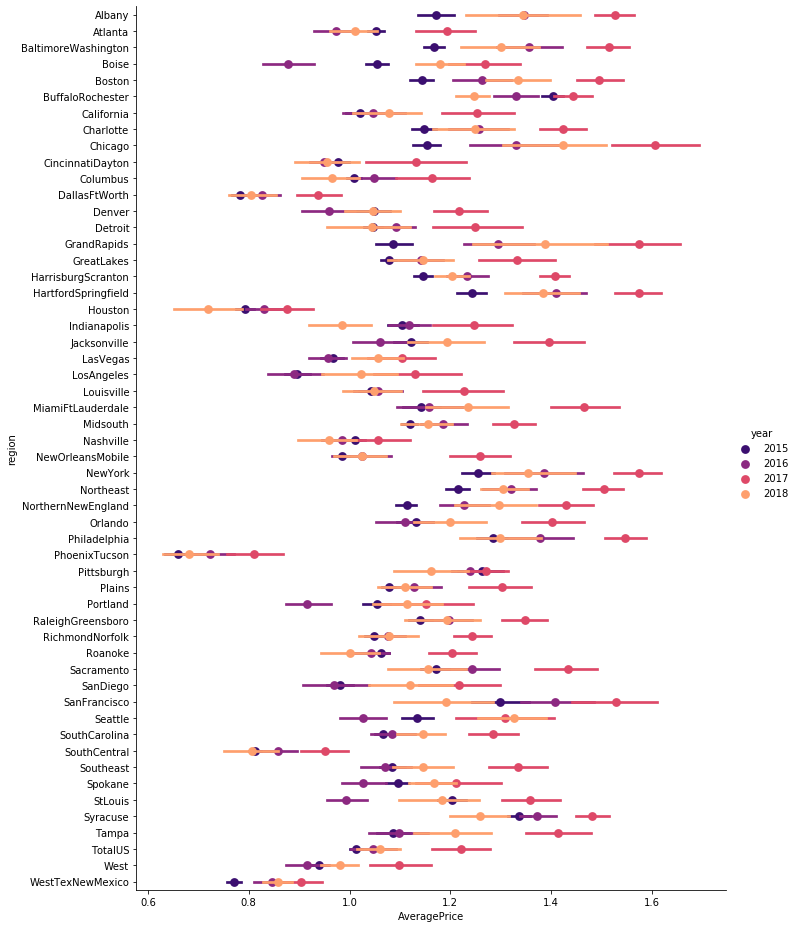

In [36]:
mask = avocadoDat['type']=='conventional'
g = sns.factorplot('AveragePrice','region',data=avocadoDat[mask],
                   hue='year',
                   size=13,
                   aspect=0.8,
                   palette='magma',
                   join=False,
              )

In [27]:
print('AveragePrice-Range grouped by Region')
groupedRegion = avocadoDat.groupby(['region'])

#Plot over days / weeks and years

MaxAveragePrice grouped by Region



In [87]:
## Dataset seperation
# dependent variable
X = avocadoDatSub.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12]]
print(X.info())

# independent variable
y = avocadoDatSub.iloc[:,[1]]
print(y.info())

# split training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   Total Volume  18249 non-null  float64       
 2   4046          18249 non-null  float64       
 3   4225          18249 non-null  float64       
 4   4770          18249 non-null  float64       
 5   Total Bags    18249 non-null  float64       
 6   Small Bags    18249 non-null  float64       
 7   Large Bags    18249 non-null  float64       
 8   XLarge Bags   18249 non-null  float64       
 9   type          18249 non-null  object        
 10  year          18249 non-null  int64         
 11  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(8), int64(1), object(2)
memory usage: 1.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 1 columns